In [ ]:
import pandas as pd
# Load the dataset
data = pd.read_csv('Virtual Patient Models_Dataset.csv')

# Display the first few rows of the dataframe
data.head()


,part_id,clinical_visit,fried,gender,q_date,age,comorbidities_most_important,hospitalization_one_year,hospitalization_three_years,ortho_hypotension,...,health_rate_comparison,pain_perception,activity_regular,smoking,alcohol_units,katz_index,iadl_grade,comorbidities_count,comorbidities_significant_count,medication_count
0,1084,1,Pre-frail,M,2016-10-05T22:52:28.000Z,78,Non of the above,0,0,No,...,3 - About the same,1.2,> 5 h per week,Past smoker (stopped at least 6 months),1.5,6.0,29,6,2,5
1,1084,2,Pre-frail,M,2017-07-20T00:00:00.000Z,79,Non of the above,0,0,No,...,3 - About the same,1.0,> 5 h per week,Past smoker (stopped at least 6 months),21.0,6.0,25,7,0,6
2,1084,3,Pre-frail,M,2017-12-01T00:00:00.000Z,79,Non of the above,0,0,No,...,3 - About the same,1.3,> 5 h per week,Past smoker (stopped at least 6 months),14.0,6.0,24,7,0,6
3,1084,4,Pre-frail,M,2018-09-24T00:00:00.000Z,80,Non of the above,0,0,No,...,3 - About the same,2.5,> 5 h per week,Past smoker (stopped at least 6 months),18.0,6.0,26,8,0,7
4,1085,1,Non frail,F,2016-10-10T15:04:04.000Z,72,Non of the above,1,3,No,...,3 - About the same,2.5,> 2 h and < 5 h per week,Past smoker (stopped at least 6 months),0.0,6.0,31,11,1,10


In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]


comorbidities_most_important      1
bmi_body_fat                     33
waist                             1
lean_body_mass                   33
mna_total                       114
cognitive_total_score             3
memory_complain                   4
sleep                             1
leisure_club                      2
house_suitable_participant       62
house_suitable_professional      62
stairs_number                    62
activity_regular                  2
dtype: int64

In [ ]:
# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Impute missing values
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

for col in categorical_cols:
    data[col].fillna(data[col].mode().iloc[0], inplace=True)

# Check if there are any missing values left
missing_values_after = data.isnull().sum().sum()

missing_values_after


0

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the column transformer with one-hot encoding for categorical columns and scaling for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Apply the transformations
data_preprocessed = preprocessor.fit_transform(data)

data_preprocessed.shape


(117, 171)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


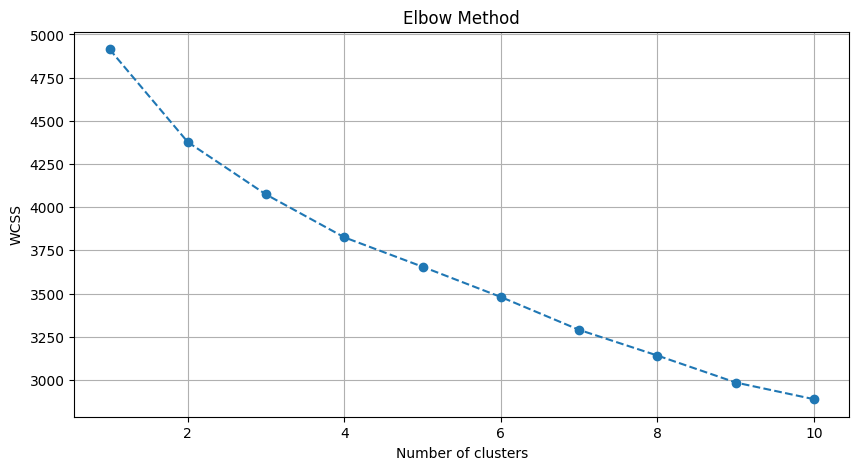

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow method
wcss = []  # within-cluster sum of squares
max_clusters = 10

for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_preprocessed)
    wcss.append(kmeans.inertia_)

# Plot the results on a graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, max_clusters+1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [ ]:
# Apply K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data_preprocessed)

# Add the cluster labels back to the original data for interpretation
data['Cluster'] = clusters

# Display the number of samples in each cluster
cluster_counts = data['Cluster'].value_counts()

cluster_counts


0    56
2    52
1     9
Name: Cluster, dtype: int64

In [ ]:
# Compute the mean values of features for each cluster
cluster_means = data.groupby('Cluster').mean()

# Display the mean values for each cluster
cluster_means.transpose()


<ipython-input-22-54ba74ce9bd3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = data.groupby('Cluster').mean()


Cluster,0,1,2
part_id,2128.000000,1096.555556,1110.923077
clinical_visit,2.410714,2.666667,2.480769
age,77.696429,80.555556,75.019231
hospitalization_one_year,0.321429,0.000000,0.192308
hospitalization_three_years,0.571429,0.444444,0.653846
exhaustion_score,1.267857,2.000000,1.076923
raise_chair_time,11.372143,451.652222,30.576346
gait_get_up,8.458750,130.311111,10.455962
gait_speed_4m,6.107321,12.703333,6.119038
gait_optional_binary,0.000000,0.111111,0.000000


In [ ]:
# Extract the relevant columns for falls and fractures
fall_fracture_data = cluster_means[['falls_one_year', 'fractures_three_years']]

fall_fracture_data


,falls_one_year,fractures_three_years
Cluster,,
0,0.571429,0.089286
1,1.111111,0.222222
2,0.134615,0.250000


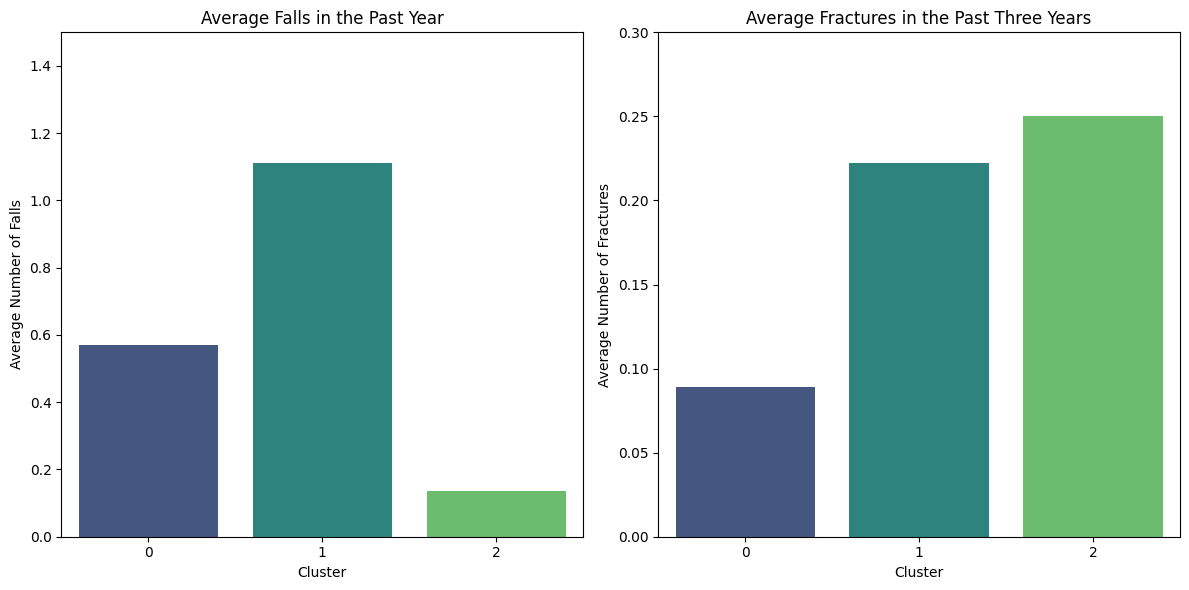

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plotting falls
plt.subplot(1, 2, 1)
sns.barplot(x=fall_fracture_data.index, y=fall_fracture_data['falls_one_year'], palette='viridis')
plt.title('Average Falls in the Past Year')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Falls')
plt.ylim(0, 1.5)

# Plotting fractures
plt.subplot(1, 2, 2)
sns.barplot(x=fall_fracture_data.index, y=fall_fracture_data['fractures_three_years'], palette='viridis')
plt.title('Average Fractures in the Past Three Years')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Fractures')
plt.ylim(0, 0.3)

plt.tight_layout()
plt.show()


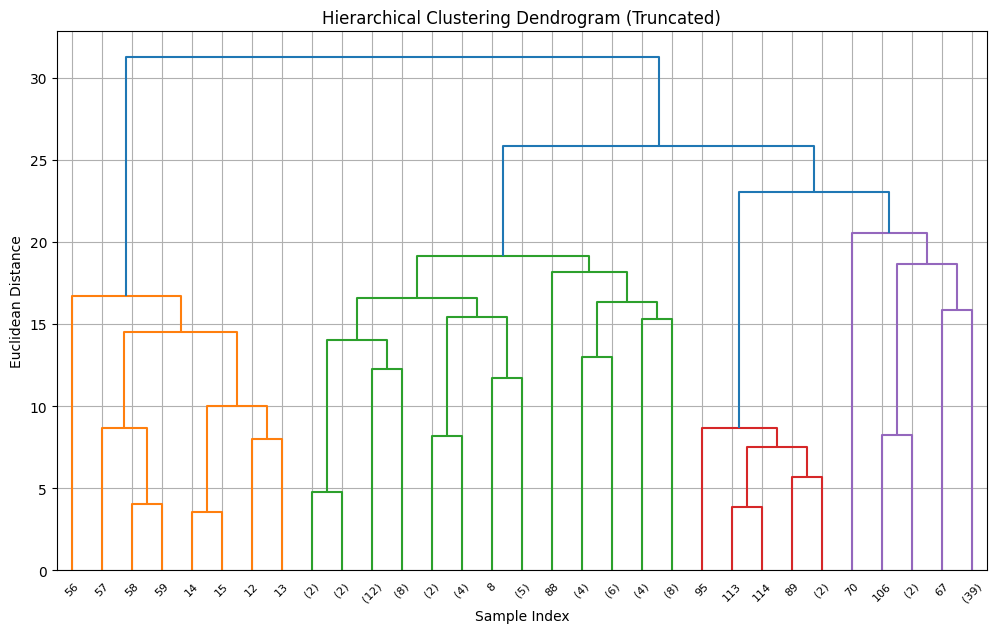

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
# Convert the sparse matrix to a dense format
data_dense = data_preprocessed.toarray()

# Compute the linkage matrix
linked = linkage(data_dense, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.grid(True)
plt.show()


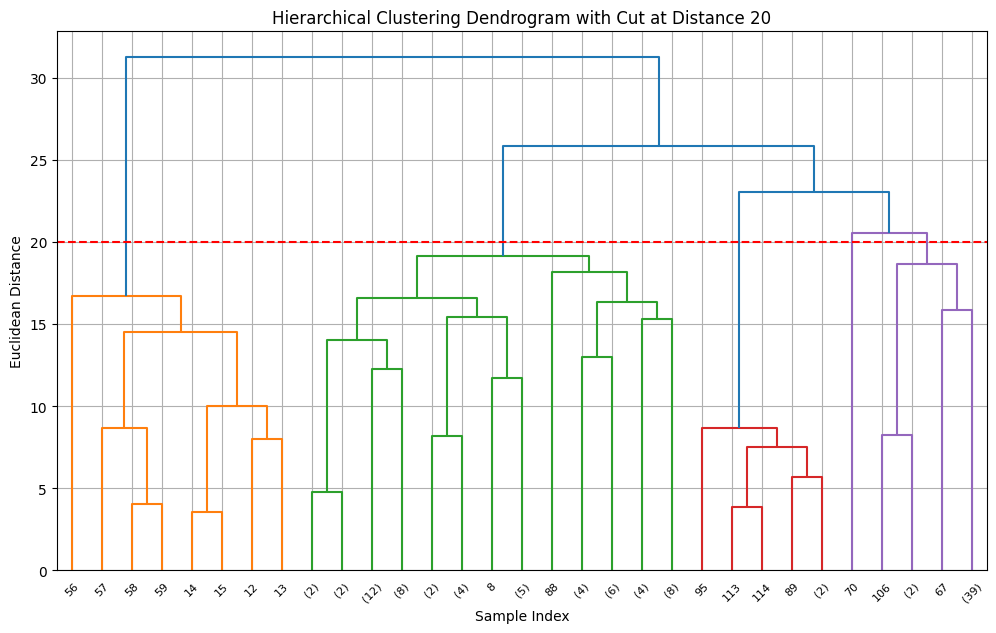

In [ ]:
# Plot the dendrogram again with a horizontal line at Euclidean distance of 20
plt.figure(figsize=(12, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram with Cut at Distance 20')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.axhline(y=20, color='r', linestyle='--')  # Drawing the horizontal line
plt.grid(True)
plt.show()


In [ ]:
from scipy.cluster.hierarchy import fcluster

# Assign samples to clusters using a max distance cut-off to achieve 3 clusters
labels = fcluster(linked, t=20, criterion='distance')

# Add the cluster labels to the original data for interpretation
data['Hierarchical_Cluster'] = labels

# Display the number of samples in each cluster
hierarchical_cluster_counts = data['Hierarchical_Cluster'].value_counts()

hierarchical_cluster_counts


2    59
4    43
1     8
3     6
5     1
Name: Hierarchical_Cluster, dtype: int64

In [ ]:
from scipy.spatial.distance import cdist

# Define the smaller clusters and the larger clusters
small_clusters = [3, 5]
large_clusters = [1, 2, 4]
# Correcting the error and merging smaller clusters into suitable larger ones

for small_cluster in small_clusters:
    for index in data[data['Hierarchical_Cluster'] == small_cluster].index:
        min_distance = float('inf')
        best_cluster = None

        for large_cluster in large_clusters:
            distance = cdist(data_dense[index].reshape(1, -1),
                             data_dense[data['Hierarchical_Cluster'] == large_cluster])
            avg_distance = distance.mean()

            if avg_distance < min_distance:
                min_distance = avg_distance
                best_cluster = large_cluster

        # Assign the sample to the best cluster
        data.at[index, 'Hierarchical_Cluster'] = best_cluster

# Display the number of samples in each cluster after merging
merged_cluster_counts = data['Hierarchical_Cluster'].value_counts()

merged_cluster_counts


2    59
4    50
1     8
Name: Hierarchical_Cluster, dtype: int64

<ipython-input-32-7ea07b91be78>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_feature_means_updated = data.groupby('Hierarchical_Cluster').mean()


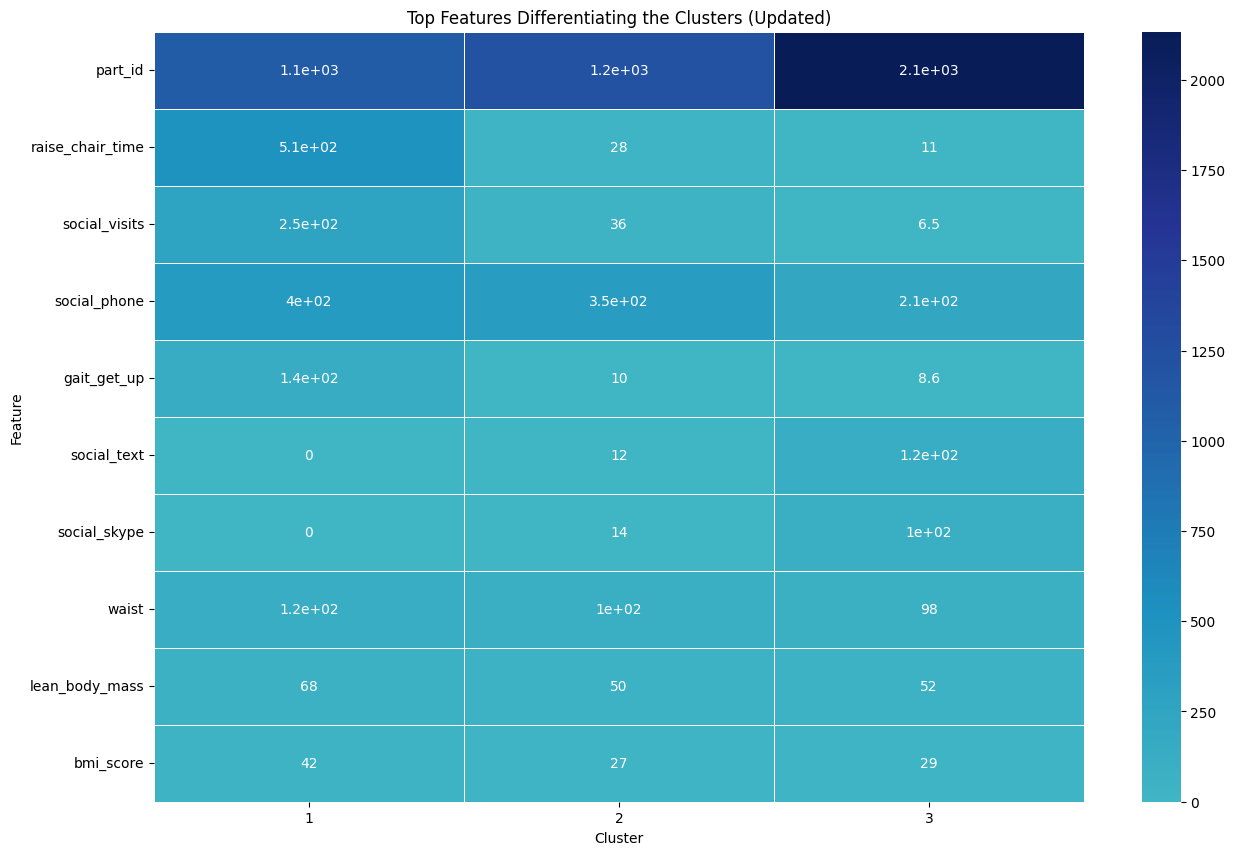

In [ ]:
# Rename Cluster 4 to Cluster 3
data['Hierarchical_Cluster'] = data['Hierarchical_Cluster'].replace(4, 3)


# Recompute the mean values of features for each cluster
cluster_feature_means_updated = data.groupby('Hierarchical_Cluster').mean()
feature_std_dev = cluster_feature_means_updated.std(axis=0)
top_features = feature_std_dev.nlargest(10).index  # Selecting top 10 features for visualization

# Plot the top features
# Visualize the top features for the updated clusters
plt.figure(figsize=(15, 10))
sns.heatmap(cluster_feature_means_updated[top_features].transpose(), annot=True, cmap="YlGnBu", center=0, linewidths=.5)
plt.title('Top Features Differentiating the Clusters (Updated)')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()


<ipython-input-33-12690c618bcd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kmeans_cluster_feature_means = data.groupby('Cluster').mean()


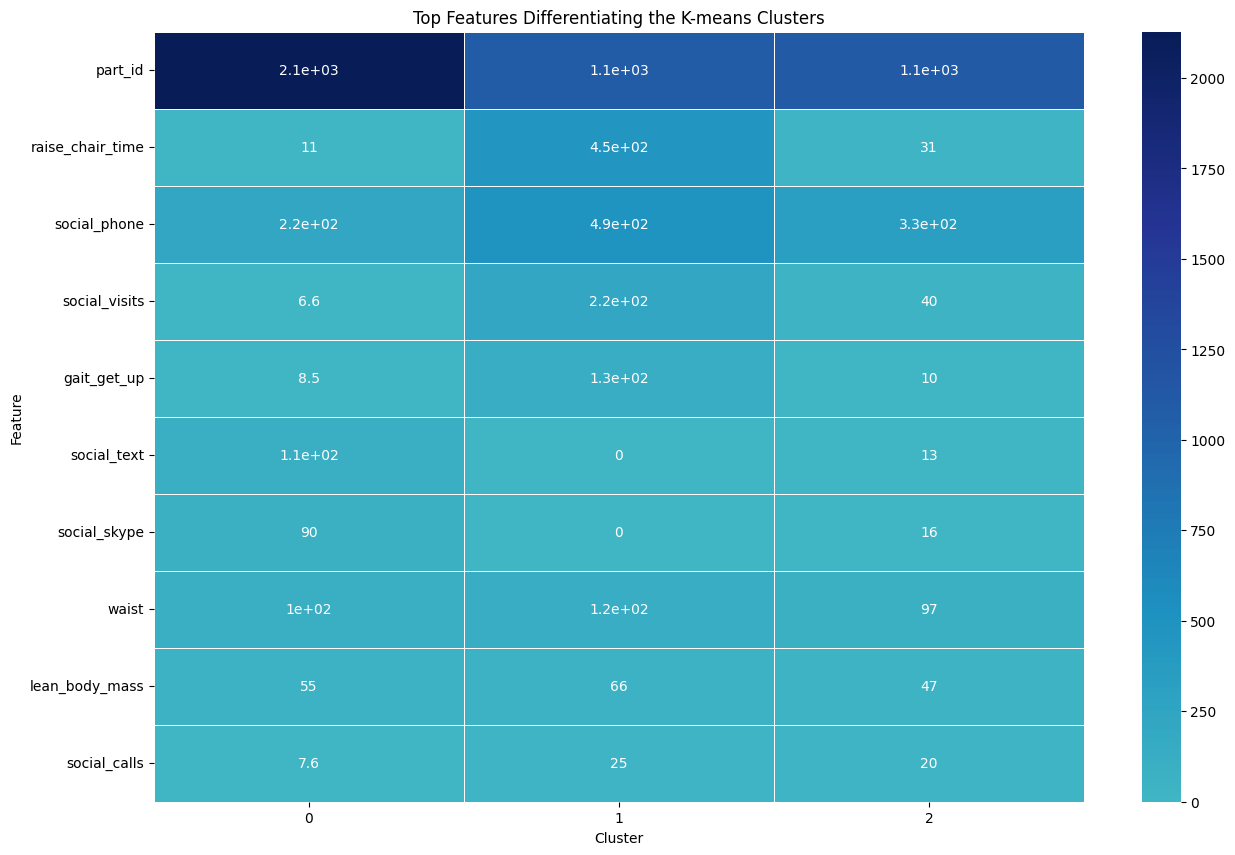

In [ ]:
# Compute the mean values of features for each K-means cluster
kmeans_cluster_feature_means = data.groupby('Cluster').mean()

# Compute the standard deviation of the means across K-means clusters for each feature
kmeans_feature_std_dev = kmeans_cluster_feature_means.std(axis=0)

# Select the top N features with the highest standard deviation for visualization
kmeans_top_features = kmeans_feature_std_dev.nlargest(10).index

# Visualize the top features differentiating the K-means clusters
plt.figure(figsize=(15, 10))
sns.heatmap(kmeans_cluster_feature_means[kmeans_top_features].transpose(), annot=True, cmap="YlGnBu", center=0, linewidths=.5)
plt.title('Top Features Differentiating the K-means Clusters')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()


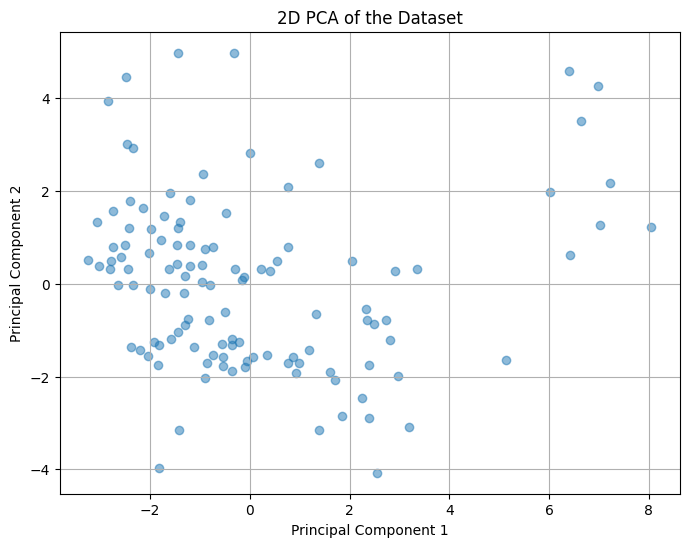

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA and reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_dense)

# Convert the PCA results to a DataFrame for easier plotting
pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of the Dataset')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

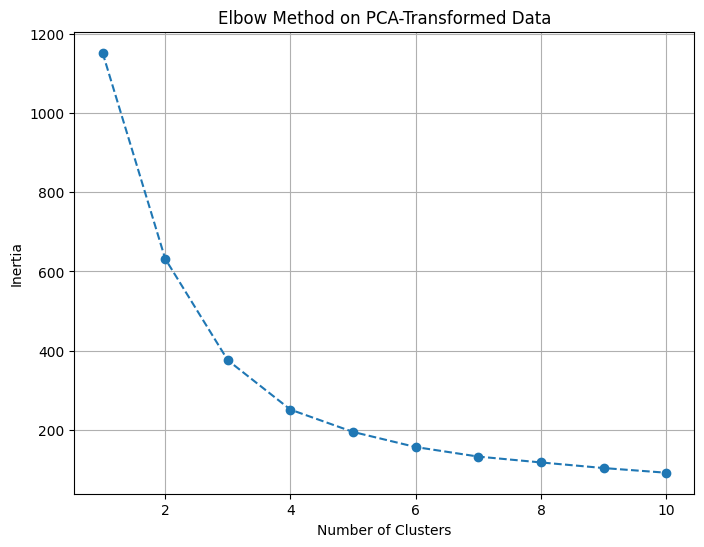

In [ ]:
# Determine the optimal number of clusters using the Elbow method on the PCA-transformed data
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)

# Plot the inertia values
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method on PCA-Transformed Data')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


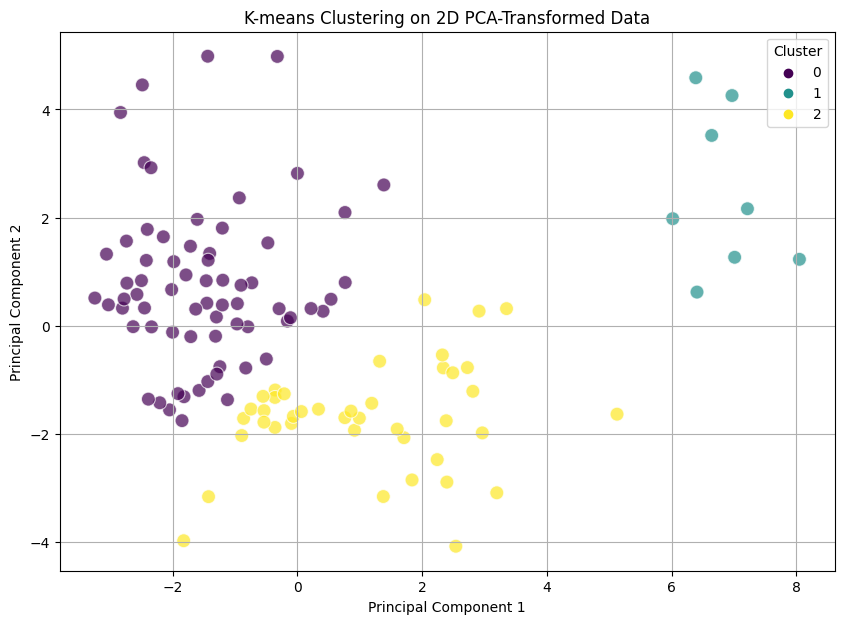

In [ ]:
# Apply K-means clustering with 3 clusters on the PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster'] = kmeans_pca.fit_predict(pca_result)

# Visualize the clustering results on the PCA-transformed data
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('K-means Clustering on 2D PCA-Transformed Data')
plt.grid(True)
plt.show()


In [ ]:
# Count the number of data points in each cluster for the PCA-transformed data
pca_cluster_counts = pca_df['Cluster'].value_counts()
pca_cluster_counts


0    68
2    41
1     8
Name: Cluster, dtype: int64

In [ ]:
# Map the cluster labels from PCA-transformed data to the original data
data['PCA_Cluster'] = pca_df['Cluster']

# Compute the mean values of features for each PCA cluster
pca_cluster_feature_means = data.groupby('PCA_Cluster').mean()

# Display the mean values of features for each PCA cluster
pca_cluster_feature_means.transpose()


<ipython-input-38-86efc7603508>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pca_cluster_feature_means = data.groupby('PCA_Cluster').mean()


PCA_Cluster,0,1,2
part_id,1945.573529,1096.000000,1115.560976
clinical_visit,2.455882,2.500000,2.463415
age,77.279412,81.000000,74.975610
hospitalization_one_year,0.294118,0.000000,0.195122
hospitalization_three_years,0.632353,0.500000,0.560976
exhaustion_score,1.205882,2.000000,1.146341
raise_chair_time,11.052794,506.437500,36.307073
gait_get_up,8.784118,144.875000,10.582439
gait_speed_4m,6.016618,13.363750,6.304634
gait_optional_binary,0.000000,0.125000,0.000000


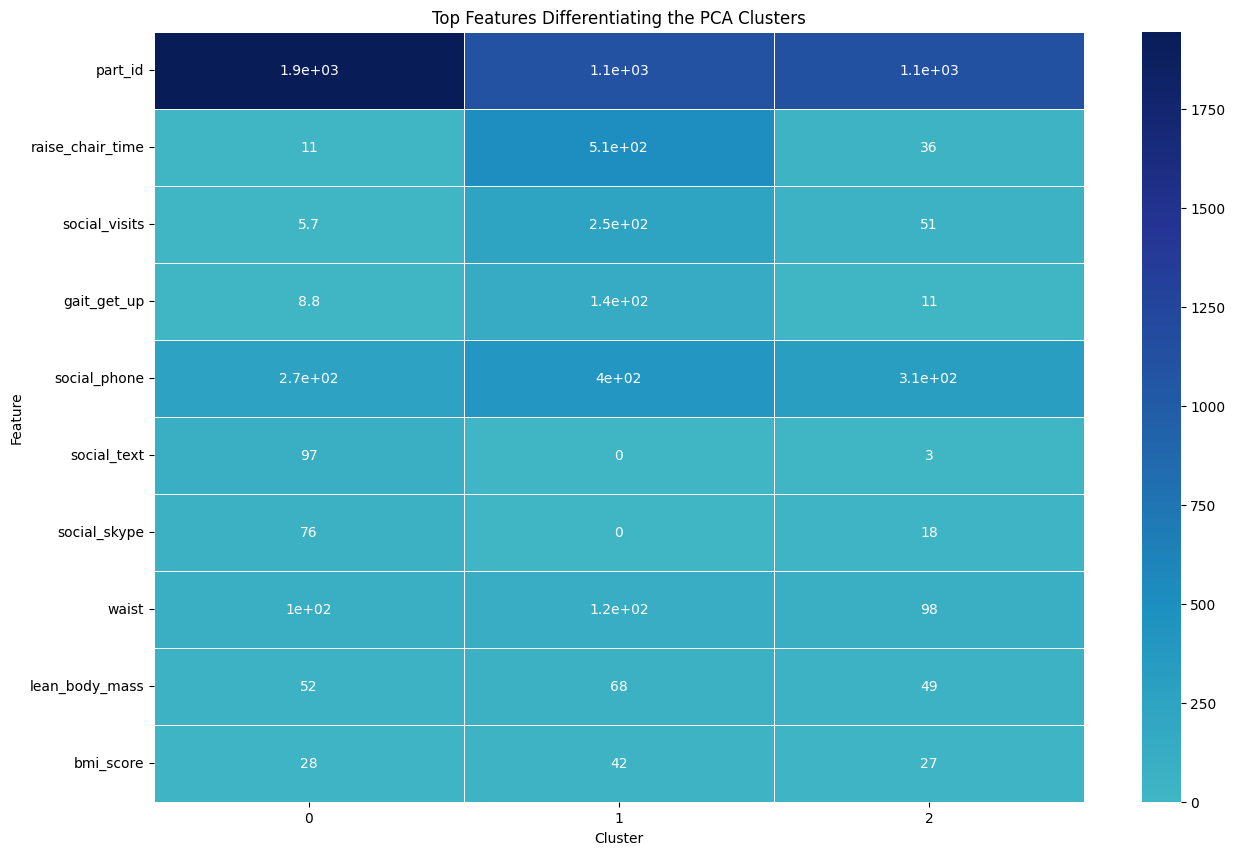

In [ ]:
# Compute the standard deviation of the means across PCA clusters for each feature
pca_feature_std_dev = pca_cluster_feature_means.std(axis=0)

# Select the top N features with the highest standard deviation for visualization
pca_top_features = pca_feature_std_dev.nlargest(10).index

# Visualize the top features differentiating the PCA clusters
plt.figure(figsize=(15, 10))
sns.heatmap(pca_cluster_feature_means[pca_top_features].transpose(), annot=True, cmap="YlGnBu", center=0, linewidths=.5)
plt.title('Top Features Differentiating the PCA Clusters')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()


<Figure size 1500x1000 with 0 Axes>

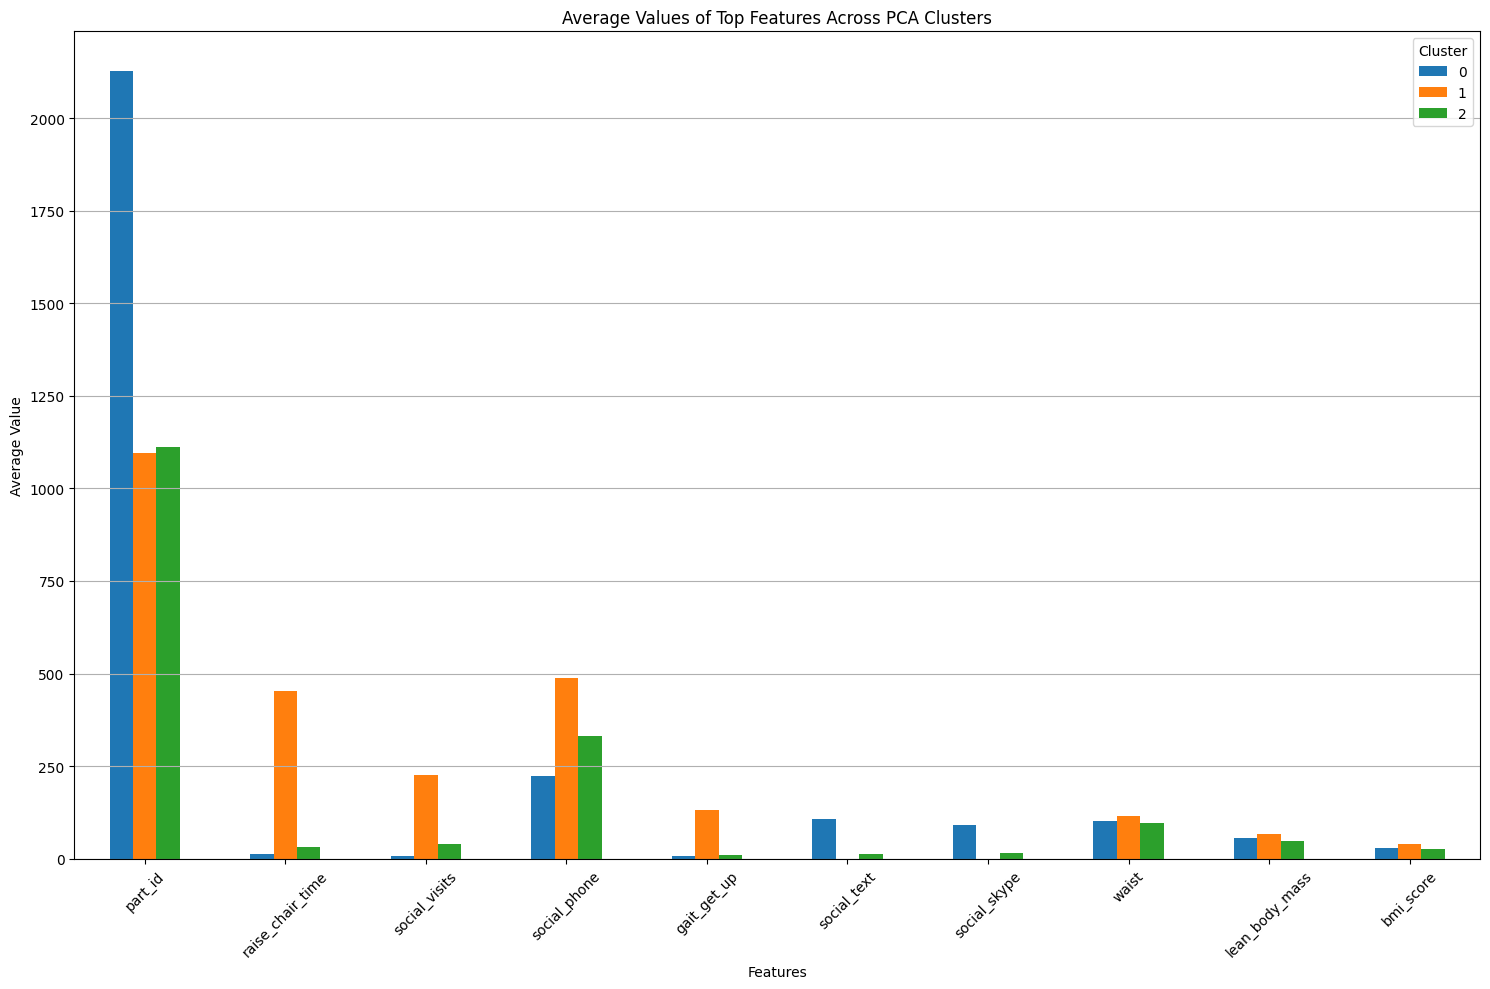

In [ ]:
import seaborn as sns

# Visualize the top features using grouped bar plots
plt.figure(figsize=(15, 10))
cluster_means[top_features].T.plot(kind='bar', figsize=(15, 10))
plt.title('Average Values of Top Features Across PCA Clusters')
plt.ylabel('Average Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()
